# NLP - Hotel review sentiment analysis in python

## Data Import


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Data Credit - https://www.kaggle.com/anu0012/hotel-review/data
df = pd.read_csv('train.csv')
df.sample()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
37088,id47414,Cleanliness: Hotel common areas were all very ...,Edge,Desktop,happy


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [4]:
df.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id10326,1
Description,38932,38932,The room was kind of clean but had a VERY stro...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


## Data Cleaning / EDA

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
# i. Convert feature variable to lower case

data = df[['Description','Is_Response']]
data['text'] = data['Description'].str.lower()

In [7]:
# ii. Tokenization

from nltk.tokenize import word_tokenize
data['text'] = data['text'].apply(word_tokenize)

In [8]:
# iii. Punctuation removal

import string

def remove_punctuation(token):
    return [i for i in token if i not in string.punctuation]
data['text'] = data['text'].apply(remove_punctuation)

In [9]:
# iv. Lemmatization   - I opted for Lemmatization in place of Stemming

from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

def lemmatize_data(token):
    return [lemma.lemmatize(i) for i in token]
data['text'] = data['text'].apply(lemmatize_data)

In [10]:
# v. Remove stopwords

from nltk.corpus import stopwords
remove_stopwords = stopwords.words('english')

def remove_words(tokens):
    return [i for i in tokens if i not in remove_stopwords]
data['text'] = data['text'].apply(remove_words)

In [11]:
# vi. Feature Extraction

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer()
data['text'] = data['text'].apply(lambda x: ' '.join(x))
X = vectorizer.fit_transform(data['text'])

print(vectorizer.vocabulary_)

{'room': 31936, 'wa': 40760, 'kind': 20732, 'clean': 7082, 'strong': 36072, 'smell': 34401, 'dog': 11241, 'generally': 15904, 'average': 2729, 'ok': 25886, 'overnight': 26566, 'stay': 35649, 're': 30016, 'fussy': 15630, 'would': 41996, 'consider': 8258, 'staying': 35666, 'price': 28877, 'right': 31653, 'breakfast': 4750, 'free': 15255, 'better': 3845, 'nothing': 25398, 'stayed': 35657, 'crown': 9204, 'plaza': 28076, 'april': 1970, 'staff': 35451, 'friendly': 15362, 'attentive': 2525, 'elevator': 12295, 'tiny': 37962, 'food': 14943, 'restaurant': 31288, 'delicious': 10070, 'priced': 28878, 'little': 21796, 'high': 17717, 'side': 33840, 'course': 8855, 'washington': 41027, 'dc': 9688, 'pool': 28329, 'child': 6625, 'fifth': 14373, 'floor': 14760, 'two': 39002, 'comfortable': 7589, 'bed': 3471, 'plenty': 28125, 'space': 34952, 'one': 25992, 'person': 27559, 'tv': 38952, 'small': 34374, 'today': 38048, 'standard': 35515, 'limited': 21676, 'number': 25489, 'channel': 6320, 'bit': 4037, 'mold

In [12]:
# vi. Encode target variable, (ML algorithms can not accomodate categorical data)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Is_Response_encode'] = le.fit_transform(data['Is_Response'])
y = data.Is_Response_encode

data.sample()

,Description,Is_Response,text,Is_Response_encode
6247,I've stayed here twice - once was when it was ...,happy,'ve stayed twice wa wa operated le meridien co...,0


## Model training

In [13]:
# i. Split dataset into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [14]:
# ii. Apply Naive Bayes Algorithm

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7987
           1       0.82      0.74      0.78      3693

    accuracy                           0.87     11680
   macro avg       0.85      0.83      0.84     11680
weighted avg       0.86      0.87      0.86     11680



In [15]:
# ii. Apply Logistic Regression Algorithm

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(solver = "lbfgs")
log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7987
           1       0.81      0.76      0.78      3693

    accuracy                           0.87     11680
   macro avg       0.85      0.84      0.84     11680
weighted avg       0.86      0.87      0.86     11680



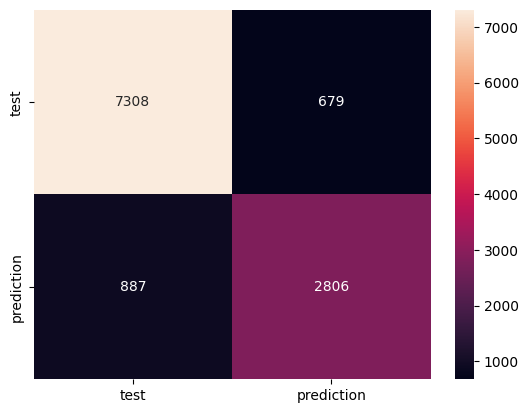

In [16]:
# iii. Visualize the Confusion Matrix from any of the models

sns.heatmap(cm, annot=True, fmt="d", xticklabels=['test', 'prediction'], yticklabels=['test', 'prediction'])
plt.show()

## Model prediciton

#### Trying on new reviews

In [17]:
# i. Import testing data

test_data = pd.read_csv('test.csv')
test_data.sample()

,User_ID,Description,Browser_Used,Device_Used
152,id80284,"We stayed at the Royalton on --th St, New York...",Mozilla Firefox,Desktop


In [18]:
# ii. Pick a record from the dataset and check its prediction

example = test_data['Description'][7]
example_vectorized = vectorizer.transform([example])  # Transform to 2D array
result = model.predict(example_vectorized)
if result == 0:
    response = "Happy and satisfied"
else:
    response = "Sad and dissatisfied"
print(f"Customer is: {response}")
print(" ")
print("BELOW IS CUSTOMER'S EXACT WORDS:")
print("\n".join(example.split('. ')))

Customer is: Sad and dissatisfied
 
BELOW IS CUSTOMER'S EXACT WORDS:
I booked out the same day I arrived
It cost me $---
No fridge or cofeemaker in room
Beverages in the reception must be paid for
Hotel all no smoking
When my partner asked if there was a rear outside smoking area the desk clerk screamed """"""""""""""""""""""""""""""""Outside Outside"""""""""""""""""""""""""""""""" and pointed to the front door
Problem is, there is a male strip club almost next door.


In [19]:
import pickle

pickle.dump(model, open("nlp_model.pkl", 'wb'))
pickle.dump(vectorizer, open("vector.pkl", 'wb'))

In [24]:
test_data['result'] = model.predict(vectorizer.transform(test_data['Description']))

In [25]:
test_data.sample()

,User_ID,Description,Browser_Used,Device_Used,result
16976,id97108,I travel a lot...and stay with Starwood brands...,Edge,Mobile,1


In [27]:
test_data['sentiment'] = test_data['result'].apply(lambda x: 'happy' if x == 0 else 'sad')

In [26]:
test_data.to_csv('sentiment_results.csv')